### Tree structure in Python using `networkx` package

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.traversal.depth_first_search import dfs_edges
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("networkx version:[%s]"%(nx.__version__))

networkx version:[3.1]


### Initialize Tree

In [2]:
tree = nx.DiGraph(name='Simple Tree') # directed graph
print ("[%s] initialized."%(tree.name))

[Simple Tree] initialized.


In [3]:
tree.add_node(0)
tree.add_node(1)
tree.add_edge(0,1)
tree.add_node(2)
tree.add_edge(0,2)
tree.add_node(3)
tree.add_edge(1,3)
tree.add_node(4)
tree.add_edge(2,4)
tree.add_node(5)
tree.add_edge(2,5)
tree.add_node(6)
tree.add_edge(4,6)
tree.add_node(7)
tree.add_edge(4,7)
tree.add_node(8)
tree.add_edge(4,8)
tree.add_node(9)
tree.add_edge(8,9)
tree.add_node(10)
tree.add_edge(9,10)

### Plot Tree

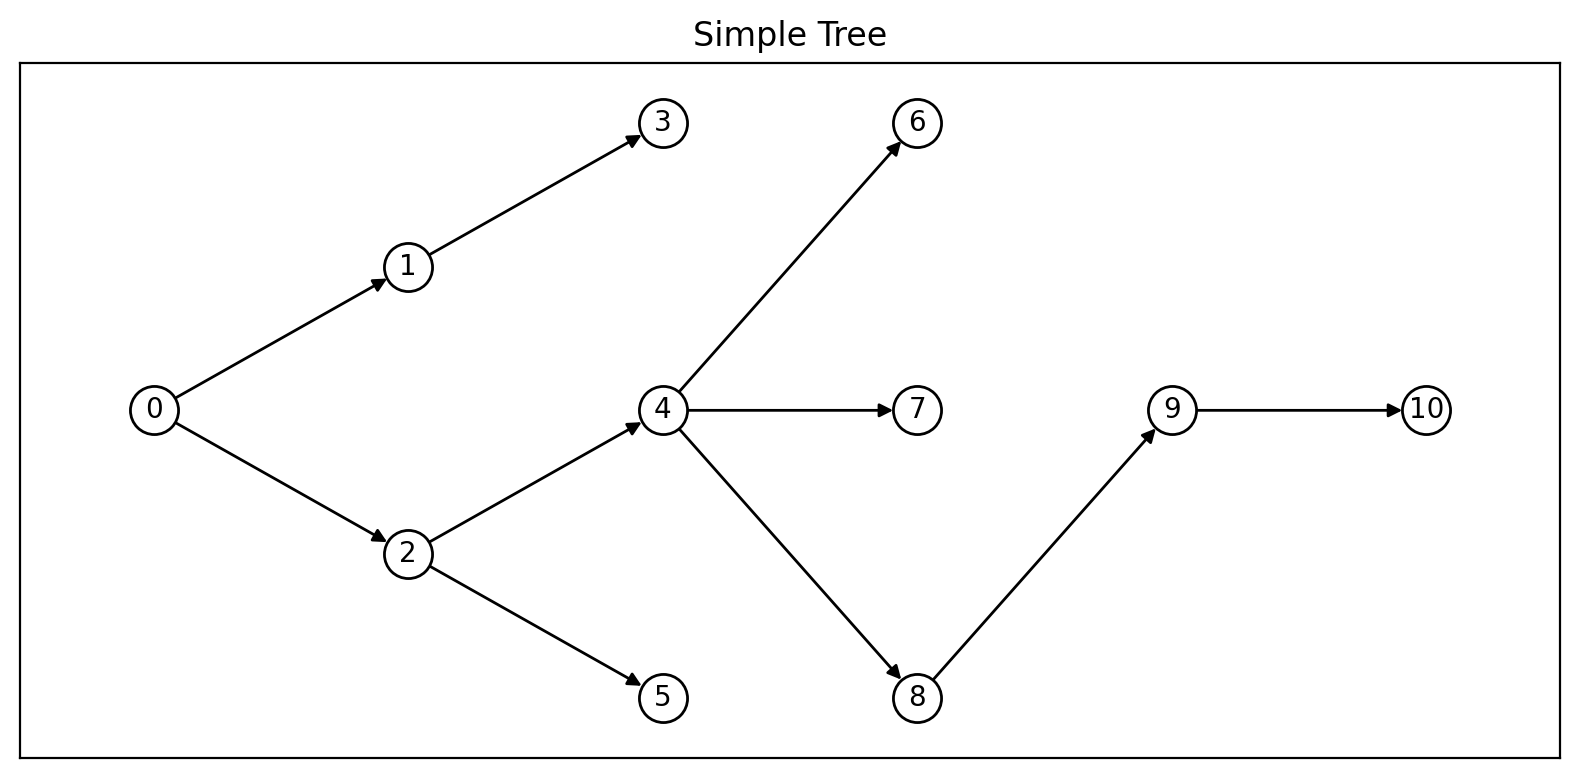

In [4]:
for layer, nodes in enumerate(nx.topological_generations(tree)):
    for node in nodes:
        tree.nodes[node]['layer'] = layer
pos = nx.multipartite_layout(tree,align='vertical',scale=1.0,subset_key='layer')
fig, ax = plt.subplots(figsize=(8,4))
nx.draw_networkx(tree,pos=pos,ax=ax,
                 node_size=300,font_size=10,node_color='w',linewidths=1,edgecolors='k')
ax.set_title('%s'%(tree.name))
fig.tight_layout()
plt.show()

### Depth-First Search

In [5]:
# From the root node
for idx,edge in enumerate(dfs_edges(tree,source=0)):
    print ("[%d] node[%d] to node[%d]"%(idx,edge[0],edge[1]))

[0] node[0] to node[1]
[1] node[1] to node[3]
[2] node[0] to node[2]
[3] node[2] to node[4]
[4] node[4] to node[6]
[5] node[4] to node[7]
[6] node[4] to node[8]
[7] node[8] to node[9]
[8] node[9] to node[10]
[9] node[2] to node[5]


In [6]:
# From a specific node
for idx,edge in enumerate(dfs_edges(tree,source=4)):
    print ("[%d] node[%d] to node[%d]"%(idx,edge[0],edge[1]))

[0] node[4] to node[6]
[1] node[4] to node[7]
[2] node[4] to node[8]
[3] node[8] to node[9]
[4] node[9] to node[10]


### Construct Tree with storing information at nodes

In [7]:
# Initialize tree
tree = nx.DiGraph(name='Tree')

# Add node 0
tree.add_node(0)

# Add information to node 0
tree.update(nodes=[(0,{'name':'World','p':np.array([0,0,0]),'R':np.eye(3)})])

# Add node 1
tree.add_node(1)

# Add information to node 1
tree.update(nodes=[(1,{'name':'World','p':np.array([0,0,0]),'R':np.eye(3)})])

# Connect node 1 to node 0
tree.add_edge(0,1)

In [8]:
for node in tree.nodes:
    print (node,tree.nodes[node])

0 {'name': 'World', 'p': array([0, 0, 0]), 'R': array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])}
1 {'name': 'World', 'p': array([0, 0, 0]), 'R': array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])}
